<a href="https://colab.research.google.com/github/RiniPaul86/Assignment_Decisiontree/blob/main/DecisiontreeA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Diabetes Prediction using DEcision Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing
from sklearn import preprocessing

In [4]:
#import the datasets
df = pd.read_csv("/content/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.ndim

2

In [7]:
df.size

6912

In [9]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
#Normalization function
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [31]:
  df_norm = norm_func(df.iloc[:,:])
  df_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [32]:
df_norm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


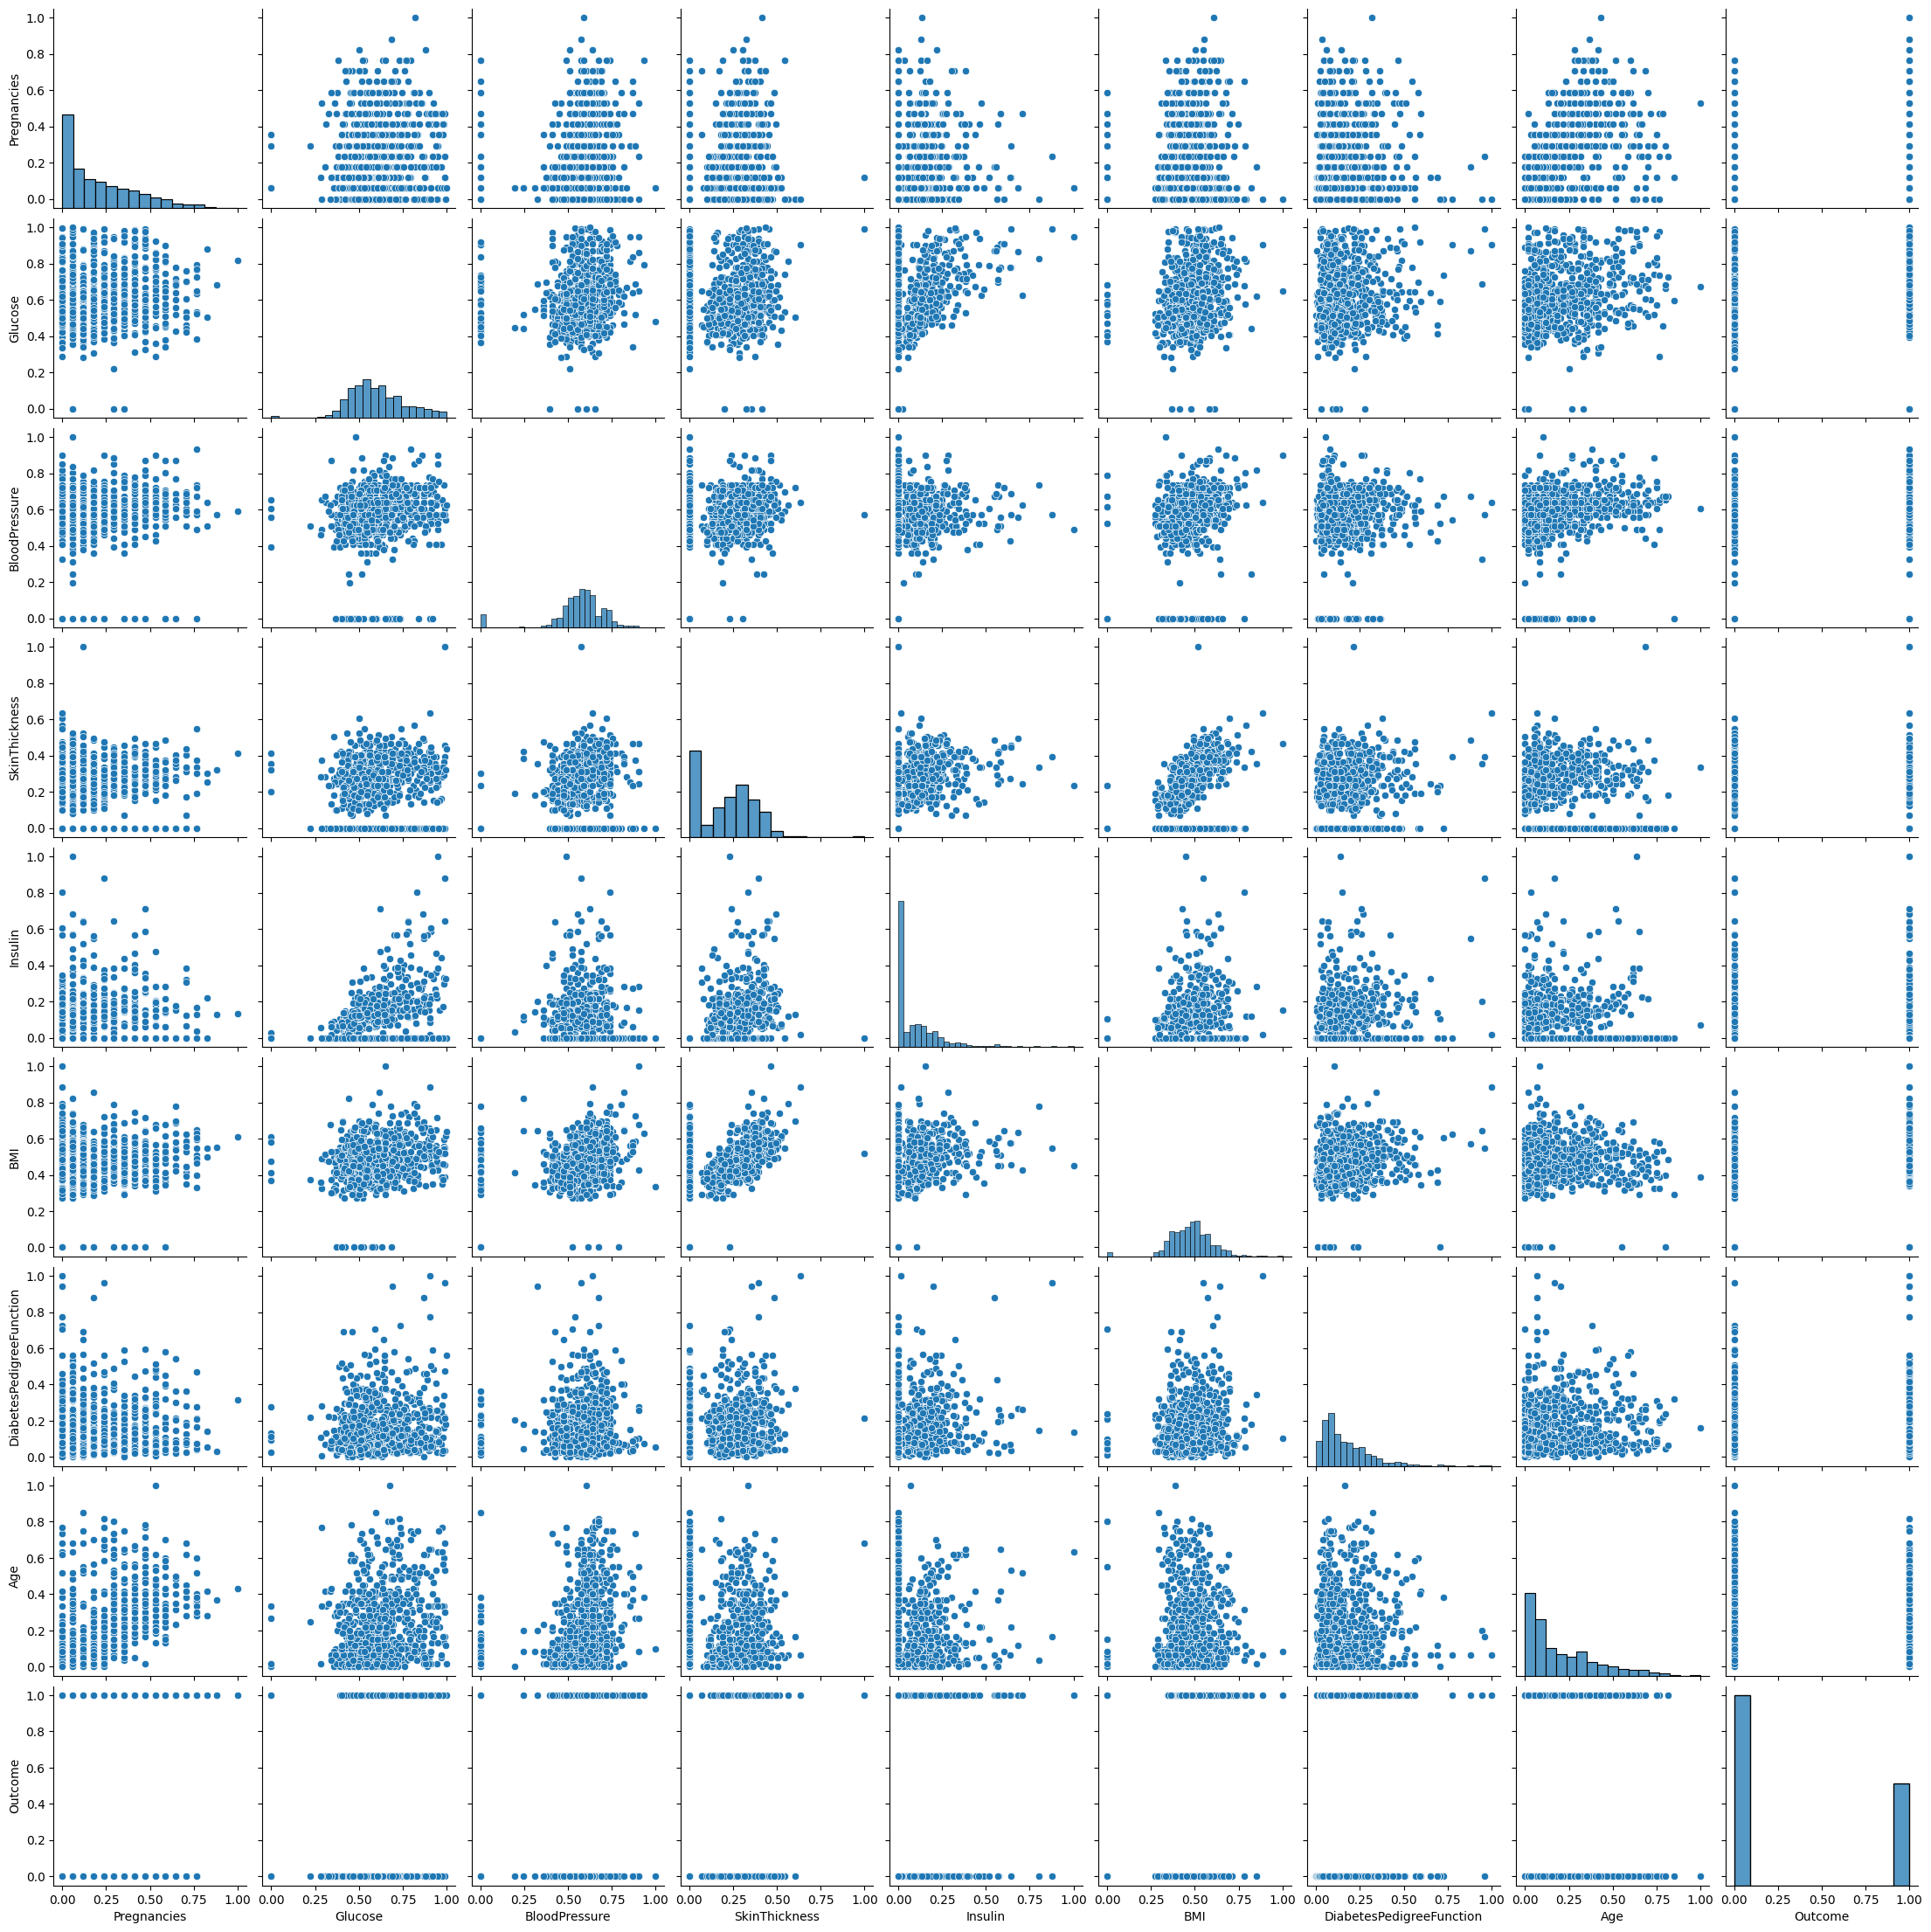

In [34]:
import seaborn as sns
sns.pairplot(df_norm)

####Decision tree

In [37]:
x = df_norm.iloc[:,0:8]
y = df_norm.iloc[:,8]

In [38]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [39]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [141]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=44)

In [142]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

####Building Decision Tree Classifier using Entropy as a Criterion


In [143]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth = 3)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

####Plot the Decsion Tree

[Text(0.5, 0.875, 'x[1] <= 0.641\nentropy = 0.917\nsamples = 614\nvalue = [410, 204]'),
 Text(0.25, 0.625, 'x[7] <= 0.125\nentropy = 0.676\nsamples = 382\nvalue = [314, 68]'),
 Text(0.125, 0.375, 'x[5] <= 0.461\nentropy = 0.414\nsamples = 216\nvalue = [198, 18]'),
 Text(0.0625, 0.125, 'entropy = 0.072\nsamples = 115\nvalue = [114, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.654\nsamples = 101\nvalue = [84, 17]'),
 Text(0.375, 0.375, 'x[4] <= 0.165\nentropy = 0.883\nsamples = 166\nvalue = [116, 50]'),
 Text(0.3125, 0.125, 'entropy = 0.803\nsamples = 143\nvalue = [108, 35]'),
 Text(0.4375, 0.125, 'entropy = 0.932\nsamples = 23\nvalue = [8, 15]'),
 Text(0.75, 0.625, 'x[5] <= 0.446\nentropy = 0.978\nsamples = 232\nvalue = [96, 136]'),
 Text(0.625, 0.375, 'x[1] <= 0.761\nentropy = 0.913\nsamples = 67\nvalue = [45, 22]'),
 Text(0.5625, 0.125, 'entropy = 0.693\nsamples = 43\nvalue = [35, 8]'),
 Text(0.6875, 0.125, 'entropy = 0.98\nsamples = 24\nvalue = [10, 14]'),
 Text(0.875, 0.375, 'x[1] <= 0.8

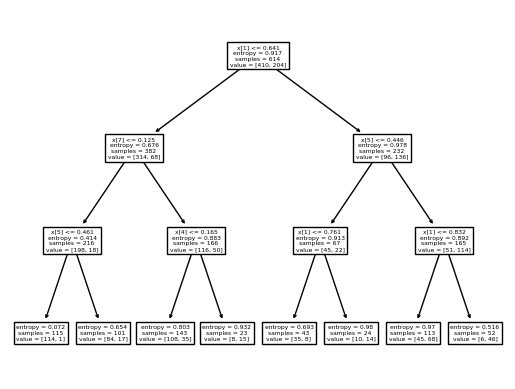

In [144]:
tree.plot_tree(model)

IndexError: ignored

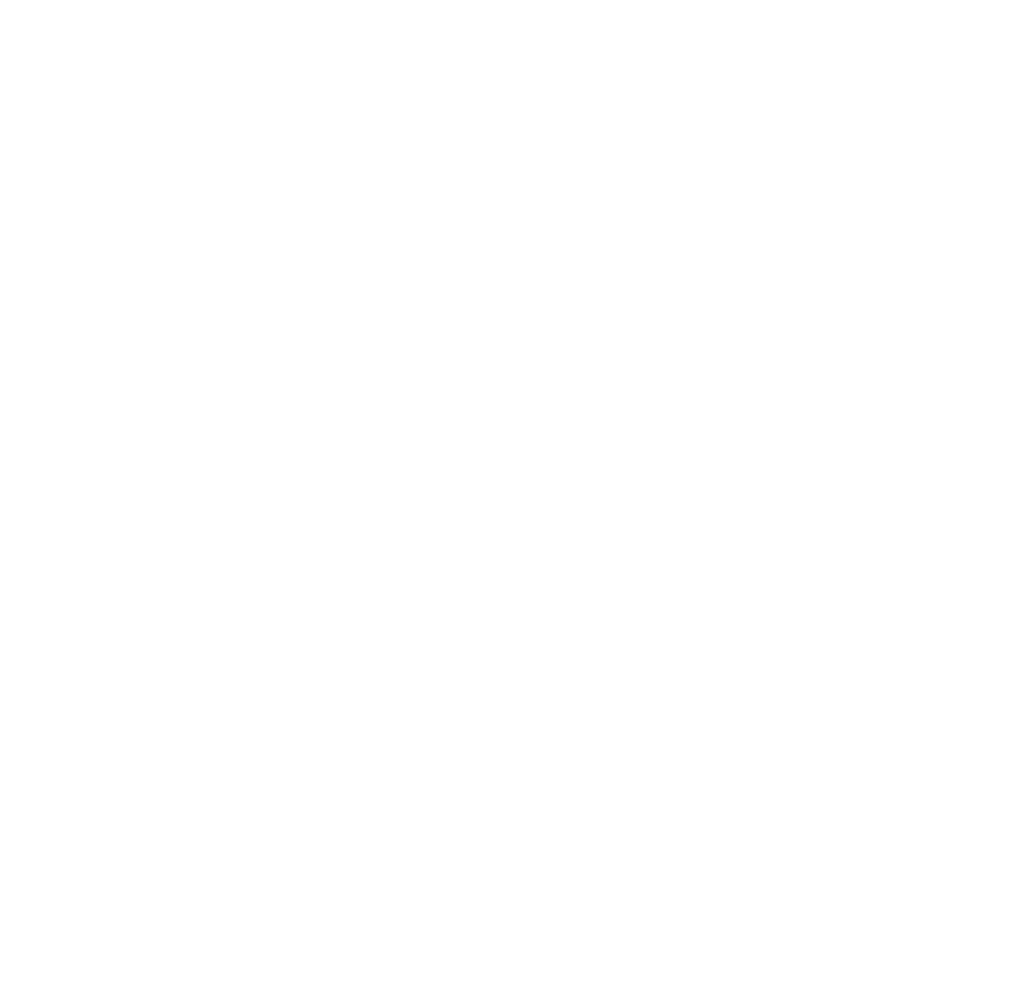

In [145]:
fn = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cn = ['Outcome']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

####Prediction on the Test data

In [146]:
preds = model.predict(x_test)

In [147]:
pd.Series(preds).value_counts()

0.0    105
1.0     49
dtype: int64

####Crosstab : Way to understand the two way table between predicted vs actual

In [148]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
Outcome,,
0.0,80,10
1.0,25,39


####Accuracy of the above model

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7727272727272727

In [150]:
x_test['preds']=preds
x_test['y_test']=y_test
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,preds,y_test
452,0.000000,0.457286,0.557377,0.323232,0.248227,0.594635,0.129377,0.066667,0.0,0.0
370,0.176471,0.869347,0.672131,0.484848,0.549645,0.572280,0.879163,0.066667,1.0,1.0
746,0.058824,0.738693,0.770492,0.414141,0.000000,0.734724,0.119556,0.100000,1.0,1.0
122,0.117647,0.537688,0.606557,0.303030,0.118203,0.500745,0.139197,0.033333,0.0,0.0
614,0.647059,0.693467,0.606557,0.262626,0.170213,0.538003,0.204526,0.483333,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
131,0.529412,0.613065,0.459016,0.000000,0.000000,0.496274,0.442357,0.200000,0.0,1.0
238,0.529412,0.824121,0.688525,0.212121,0.000000,0.459016,0.321520,0.183333,1.0,1.0
634,0.588235,0.462312,0.508197,0.000000,0.000000,0.385991,0.038002,0.166667,0.0,0.0
731,0.470588,0.603015,0.704918,0.000000,0.000000,0.423249,0.077284,0.016667,0.0,1.0
